1


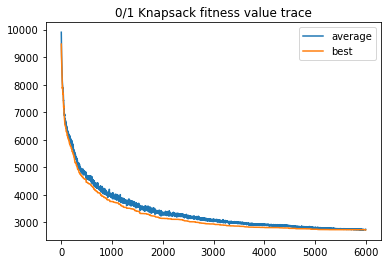

2


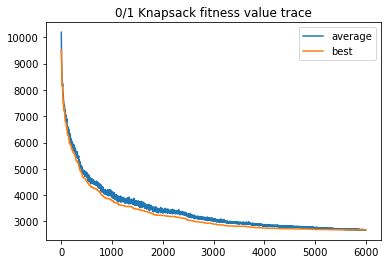

3


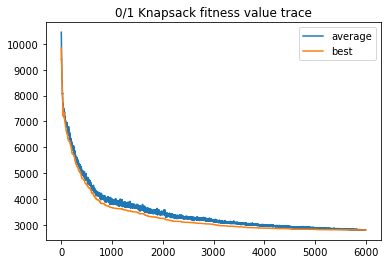

4


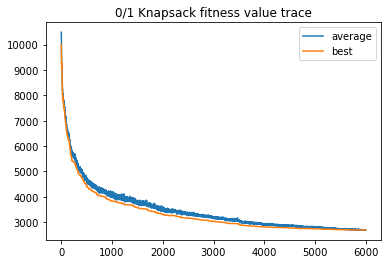

5


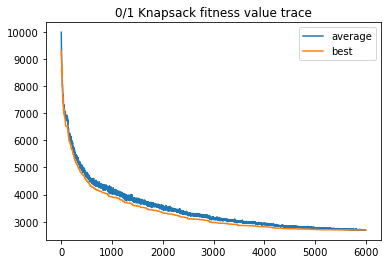

6


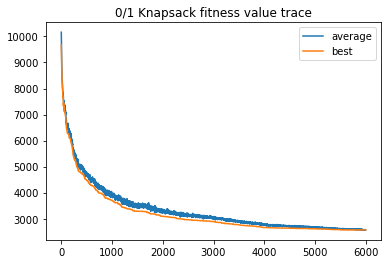

7


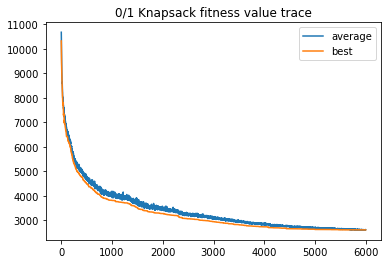

8


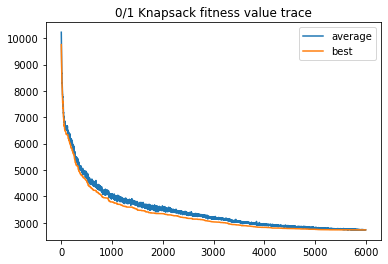

9


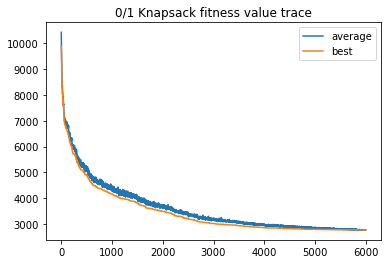

10


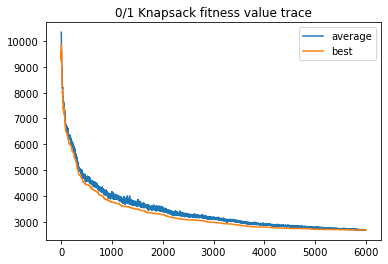

11


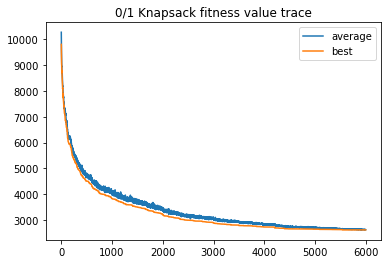

12


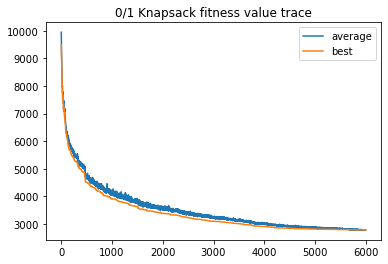

13


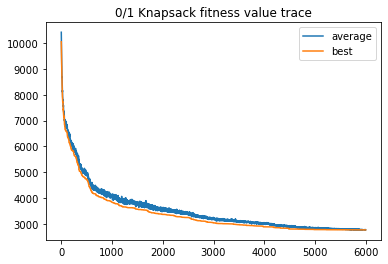

14


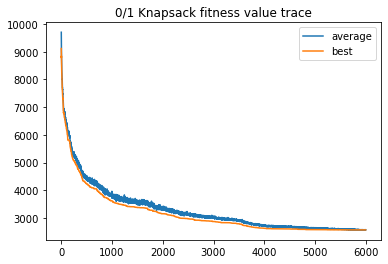

15


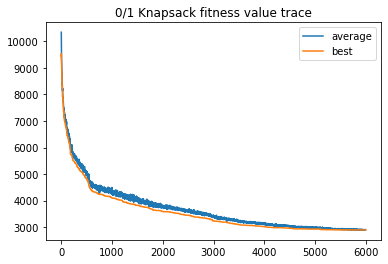

16


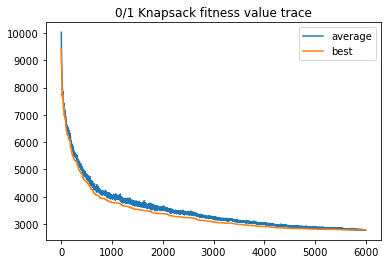

17


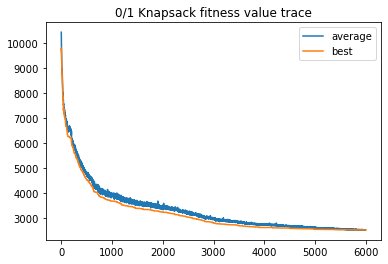

18


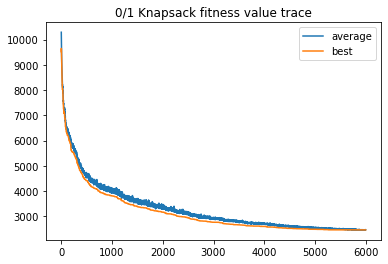

19


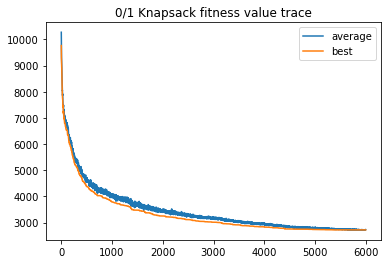

20


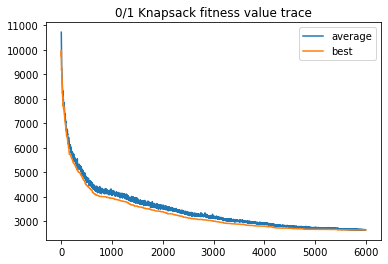

21


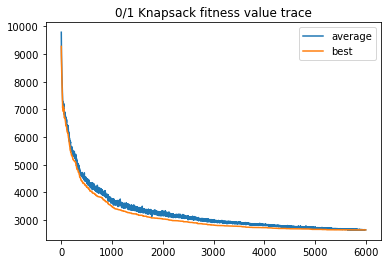

22


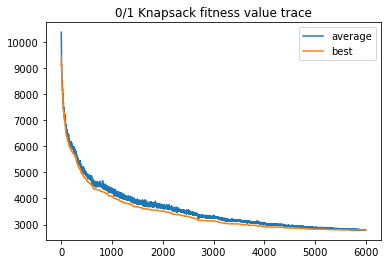

23


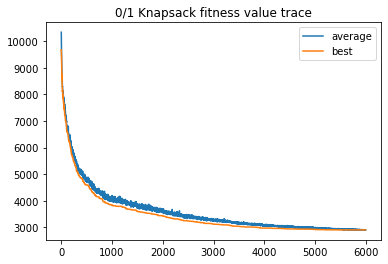

24


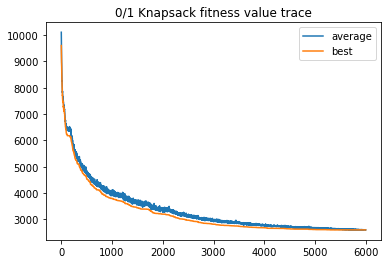

25


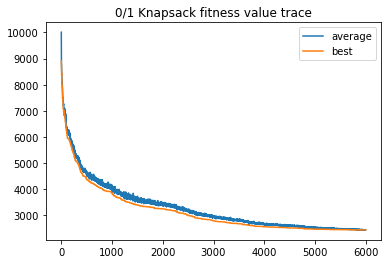

26


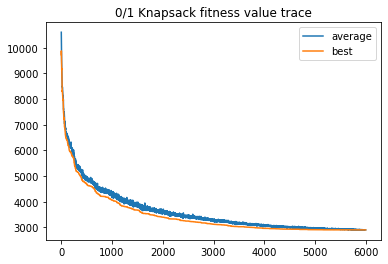

27


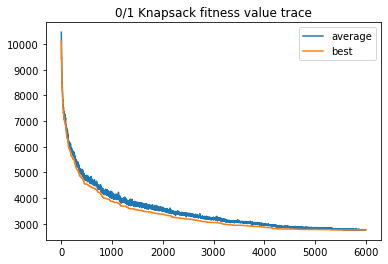

28


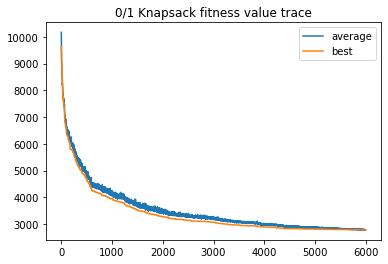

29


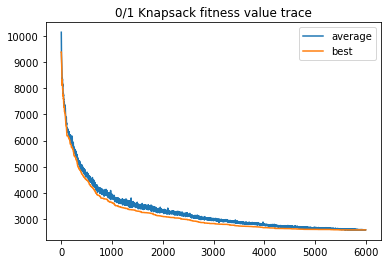

30


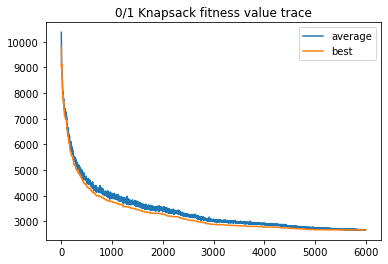

In [172]:
import matplotlib.pyplot as plt
import random
import numpy as np
from copy import deepcopy

def read_data(filename):
    """Parse problem specifications from the data file."""
    i=0
    data=[]
    with open(filename, "r") as f:
        # header
        for line in f:
            if i>3:
                iwp = line.strip().split(',')
                new_iwp = list(map(float, iwp))
                data.append(new_iwp)
            i+=1
        return data

def initialize():
    return [spawn_individual() for x in range (0,100)]
def spawn_individual():
    shuffled_num=np.arange(200)
    np.random.shuffle(shuffled_num)
    shuffled_num=shuffled_num.tolist()
    return shuffled_num

def fitness_function(individual,table):
    """Calculate fitness value of an individual."""
    sum_profit = 0
    for i in range(199):

        sum_profit+=table[individual[i]][individual[i+1]]
    return sum_profit    
        
def tournament_Selection (population, fitness):
    new_population = list(range(0,100))
    for i in range(100):
        x=random.randint(0,99)
        if fitness[i]>fitness[x]:
            new_population[i]=deepcopy(population[x])
        else:
            new_population[i]=deepcopy(population[i])
    return new_population
def shuffling(X,Y):
    idx = np.arange(len(X))
    np.random.shuffle(idx)
    for i in range(len(X)):
        
        X[i]=deepcopy(X[idx[i]])
        Y[i]=deepcopy(Y[idx[i]])
        
def sorting(X,Y):

    B=sorted(Y)
    A=[]


    for i in range(len(X)):
        for j in range(len(X)):
            if B[i]==Y[j]:

                A.append(X[j])
    return A,B

        
def mutate(population):
    for i in range(100):
        for k in range(200):
            if np.random.rand()<0.01:
                index=random.randint(0,199)
                aux=deepcopy(population[i][index])
                population[i][index]=deepcopy(population[i][k])
                population[i][k]=deepcopy(aux)
                
def crossover(population):

    for i in range (0,50):
        child_1 = list(range(0,200))
        child_2 = list(range(0,200))
        for x in range(0,200):
            child_1[x]=None
            child_2[x]=None
        if np.random.rand()<0.9:
            pos = [random.randint(0,199) for _ in range(2)]
            pos.sort()
            for k in range(pos[0]+1,pos[1]+1):
                child_1[k]=deepcopy(population[i][k])
                child_2[k]=deepcopy(population[i+50][k])
            
            for j in range(200):
                if not population[i+50][j] in child_1:
                    for y in range(200):
                        if child_1[y] == None:
                            child_1[y] = deepcopy(population[i+50][j])
                            break           
            for a in range(200):
                if not population[i][a] in child_2:
                    for y in range(200):
                        if child_2[y] == None:
                            child_2[y] = deepcopy(population[i][a])
                            break
            population[i]=deepcopy(child_2)
            population[i+50]=deepcopy(child_1)
            for b in range(200):
                if population[i][b]==None:
                    print("no!")

def visualize (data1,data2,population,fitness_function,a):    
    plt.title("0/1 Knapsack fitness value trace")
    plt.plot(range(6000), data1, label="average")
    plt.plot(range(6000), data2, label="best")
    plt.legend()
    plt.savefig('./trace%s.png'%a)
    plt.show()
    txt = ""
    for k in range(100):
        txt += "{},{:.6f}\n".format(pop1[k], fitness[k])
    with open("fitness-%s"%a, "w") as f:
        f.write(txt)
            
                
                
            
if __name__ == '__main__':
    for i in range(1,31):
        filename = 'data-%s.txt'%i
        table=read_data(filename)
        print(i)
        pop1=initialize()
        pop2=initialize()


        fitness = list(range(0,100))
        history=list(range(0,6000))
        history2=list(range(0,6000))

        for p in range(100):
            fitness[p] = fitness_function(pop1[p],table)
        for g in range(6000):
            pop1,fitness=sorting(pop1,fitness)
            for k in range (int(g/60)): ##Elitism (비율이 세대에 걸쳐서 조금씩 증가)
                pop2[k]=pop1[k]
    
            pop1=tournament_Selection(pop1,fitness)
            shuffling(pop1,fitness)
            crossover(pop1)
            mutate(pop1)
            pop1,fitness=sorting(pop1,fitness)
            for k in range (int(g/60),100):
                pop2[k]=pop1[k-int(g/60)]
            pop1=pop2
            
            for u in range(100):

                fitness[u] = fitness_function(pop1[u],table)
            history[g]=sum(fitness)/len(fitness)
            history2[g]=min(fitness)
        visualize(history,history2,pop1,fitness,i)


            
        



        